In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
dftemp = pd.read_excel('covid19_ecdc.xlsx')
df_june = dftemp[dftemp['dateRep'] >= '2020-06-01']
df_june = df_june.set_index('dateRep')
df_june

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-08-27,27,8,2020,55,4,Afghanistan,AF,AFG,38041757.0,Asia,2.053007
2020-08-26,26,8,2020,1,0,Afghanistan,AF,AFG,38041757.0,Asia,2.108210
2020-08-25,25,8,2020,71,10,Afghanistan,AF,AFG,38041757.0,Asia,2.670749
2020-08-24,24,8,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
2020-08-23,23,8,2020,105,2,Afghanistan,AF,AFG,38041757.0,Asia,2.484112
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05,5,6,2020,15,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.270017
2020-06-04,4,6,2020,16,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.188080
2020-06-03,3,6,2020,3,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,1.092488


In [82]:
grouped = df_june.groupby('countriesAndTerritories')

df = pd.DataFrame()
for name, group in grouped:
    if name == 'Philippines':
        df = group
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88 entries, 2020-08-27 to 2020-06-01
Data columns (total 11 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   day                                                         88 non-null     int64  
 1   month                                                       88 non-null     int64  
 2   year                                                        88 non-null     int64  
 3   cases                                                       88 non-null     int64  
 4   deaths                                                      88 non-null     int64  
 5   countriesAndTerritories                                     88 non-null     object 
 6   geoId                                                       88 non-null     object 
 7   countryterritoryCode                                        88 non-null

In [83]:
df = df[['day', 'month', 'year', 'cases', 'deaths']]
df = df.iloc[::-1]
xFrame = df.drop('cases', axis=1)
yFrame = df['cases']

xtrain, xtest, ytrain, ytest = train_test_split(xFrame.values, yFrame.values, test_size=0.40, shuffle=False)

In [84]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((52, 4), (52,), (36, 4), (36,))

In [85]:
model = LinearRegression()
model.fit(xtrain, ytrain)
prediction = model.predict(xtest)

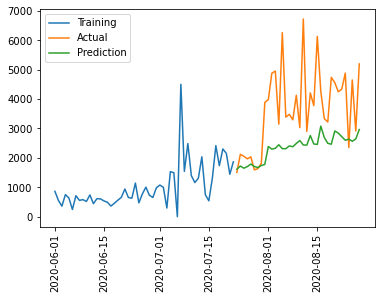

In [86]:
plt.plot(df.index[:-len(prediction)], ytrain, label='Training')
plt.plot(df.index[-len(prediction):], ytest, label='Actual')
plt.plot(df.index[-len(prediction):], prediction, label='Prediction')
plt.xticks(rotation=90)
plt.legend()
plt.show()